In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns


print("All libraries loaded successfully")


All libraries loaded successfully


In [26]:
df1 = pd.read_csv("Medibuddy insurance data personal details.csv")
df2 = pd.read_csv("Medibuddy Insurance Data Price.csv")

print("Medibuddy insurance data personal details:")
print(df1.head())

print("\nMedibuddy Insurance Data Price:")
print(df2.head())

Medibuddy insurance data personal details:
  Policy no.  children smoker     region
0  PLC157006         0     no  southwest
1  PLC157033         1     no  southwest
2  PLC157060         0     no  southwest
3  PLC157087         1     no  southwest
4  PLC157186         5     no  southwest

Medibuddy Insurance Data Price:
  Policy no.  age     sex     bmi  charges in INR
0  PLC156898   19  female  27.900     16884.92400
1  PLC156907   18    male  33.770      1725.55230
2  PLC156916   28    male  33.000      4449.46200
3  PLC156925   33    male  22.705     21984.47061
4  PLC156934   32    male  28.880      3866.85520


In [27]:
import os
print(os.listdir())


['.DS_Store', 'Medibuddy Insurance Data Price.csv', '.venv', 'Medibuddy insurance data personal details.csv']


In [28]:
df = pd.merge(df1, df2, on="Policy no.")

print("Merged dataset shape:", df.shape)
print(df.head())


Merged dataset shape: (1338, 8)
  Policy no.  children smoker     region  age     sex   bmi  charges in INR
0  PLC157006         0     no  southwest   23    male  34.4        1826.843
1  PLC157033         1     no  southwest   19    male  24.6        1837.237
2  PLC157060         0     no  southwest   56    male  40.3       10602.385
3  PLC157087         1     no  southwest   30  female  32.4        4149.736
4  PLC157186         5     no  southwest   19  female  28.6        4687.797


In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [30]:
df.describe()


,children,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,39.207025,30.663397,13270.422265
std,1.205493,14.049960,6.098187,12110.011237
min,0.000000,18.000000,15.960000,1121.873900
25%,0.000000,27.000000,26.296250,4740.287150
50%,1.000000,39.000000,30.400000,9382.033000
75%,2.000000,51.000000,34.693750,16639.912515
max,5.000000,64.000000,53.130000,63770.428010


In [31]:
df.rename(columns={"charges in INR": "charges"}, inplace=True)
print(df.columns)


Index(['Policy no.', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges'],
      dtype='object')


In [32]:
df["charges"].mean()

np.float64(13270.422265141257)

In [33]:
df.groupby("sex")["charges"].mean()

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

In [34]:
df.groupby("smoker")["charges"].mean()


smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

In [35]:
df.groupby("region")["charges"].mean()


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [36]:
df.groupby("children")["charges"].mean()

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

In [37]:
df[["age", "charges"]].corr()


,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [38]:
df[["bmi", "charges"]].corr()


,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [39]:
df.groupby("region")["charges"].mean()


region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

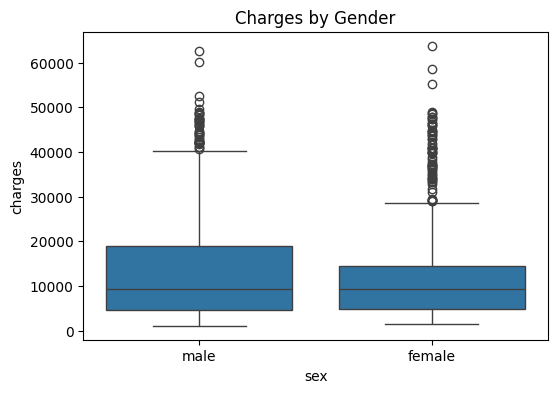

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="charges", data=df)
plt.title("Charges by Gender")
plt.show()


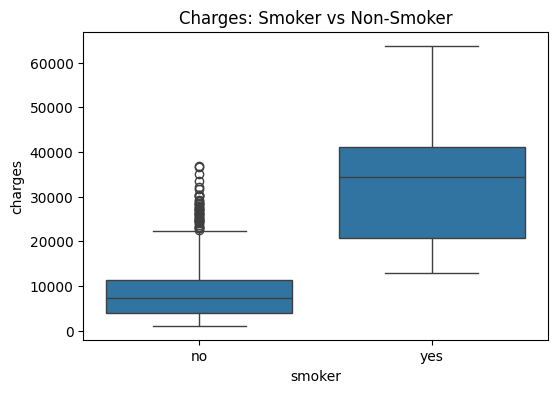

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges: Smoker vs Non-Smoker")
plt.show()


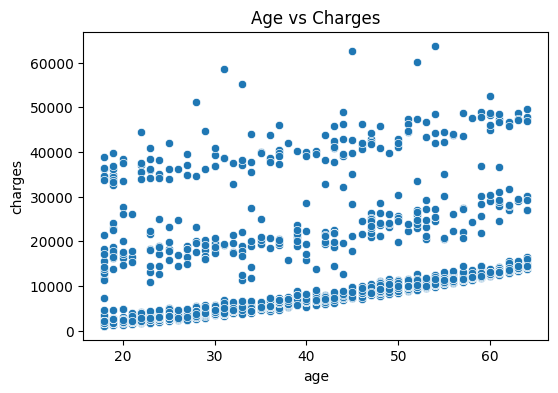

In [47]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", data=df)
plt.title("Age vs Charges")
plt.show()


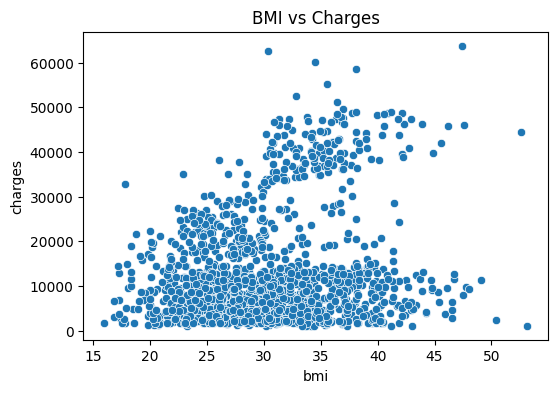

In [44]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="charges", data=df)
plt.title("BMI vs Charges")
plt.show()


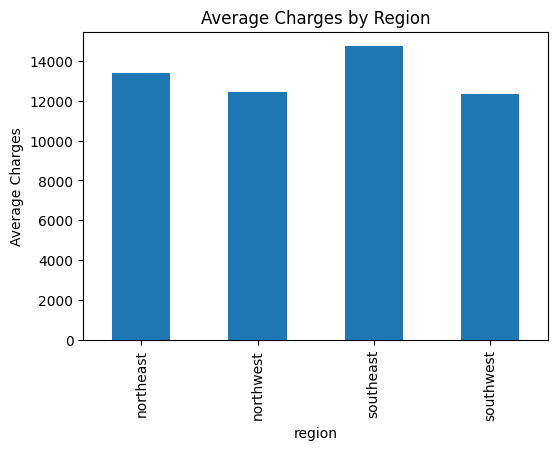

In [48]:
plt.figure(figsize=(6,4))
df.groupby("region")["charges"].mean().plot(kind="bar")
plt.title("Average Charges by Region")
plt.ylabel("Average Charges")
plt.show()


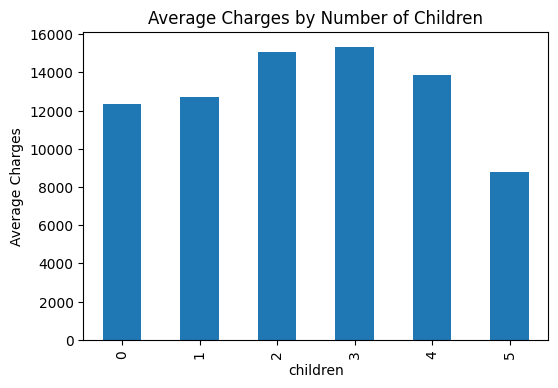

In [49]:
plt.figure(figsize=(6,4))
df.groupby("children")["charges"].mean().plot(kind="bar")
plt.title("Average Charges by Number of Children")
plt.ylabel("Average Charges")
plt.show()
